In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [3]:
data=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
539,3,129,92,49,155,36.4,0.968,32,1
755,1,128,88,39,110,36.5,1.057,37,1
262,4,95,70,32,0,32.1,0.612,24,0
95,6,144,72,27,228,33.9,0.255,40,0
600,1,108,88,19,0,27.1,0.400,24,0


* There is no null value in this dataset

In [5]:
x=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [6]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

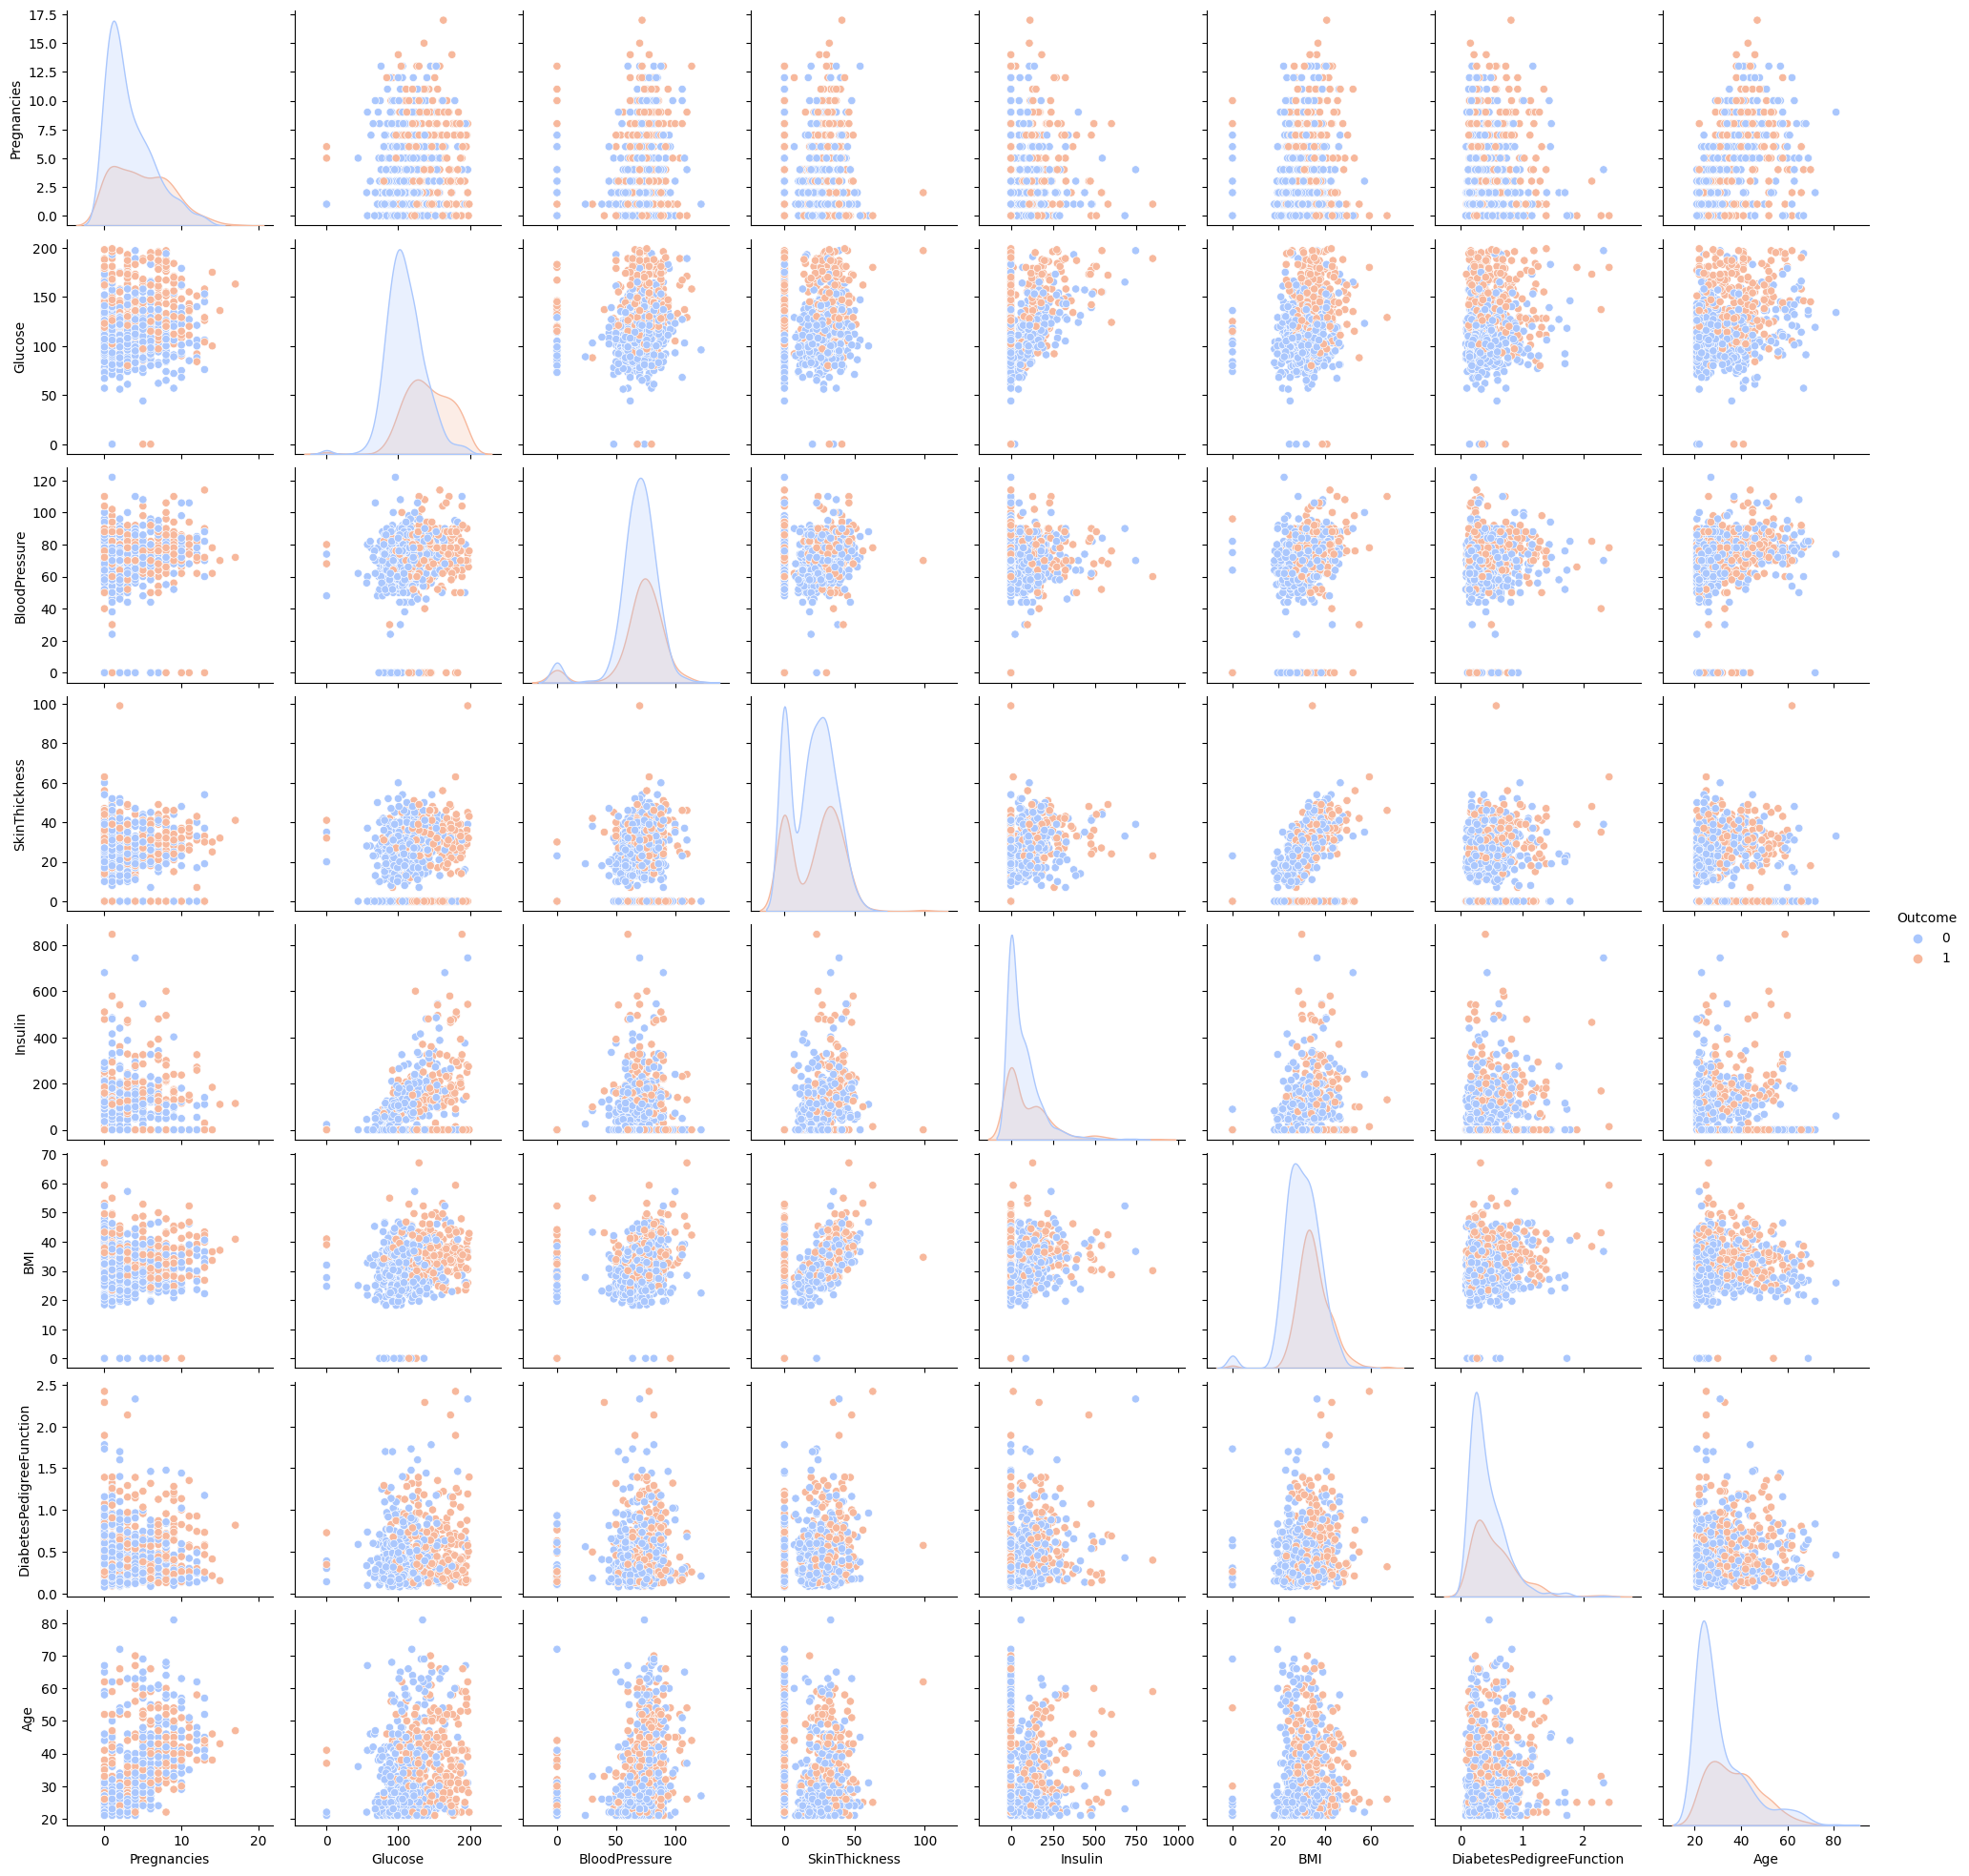

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


sns.pairplot(data, hue='Outcome',  palette='coolwarm')


Text(0.5, 1.0, 'Correlation Heatmap Between Features')

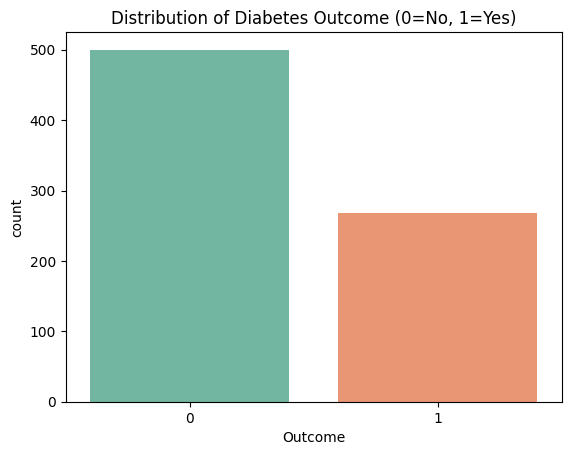

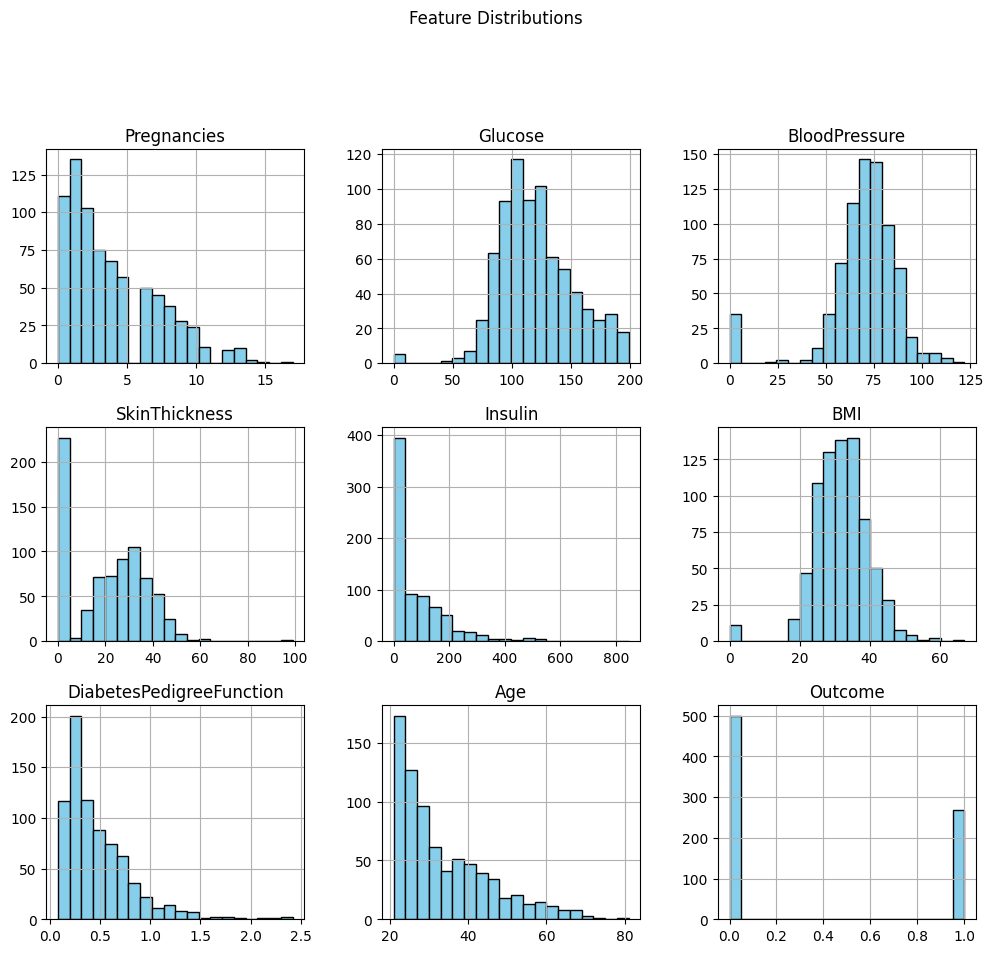

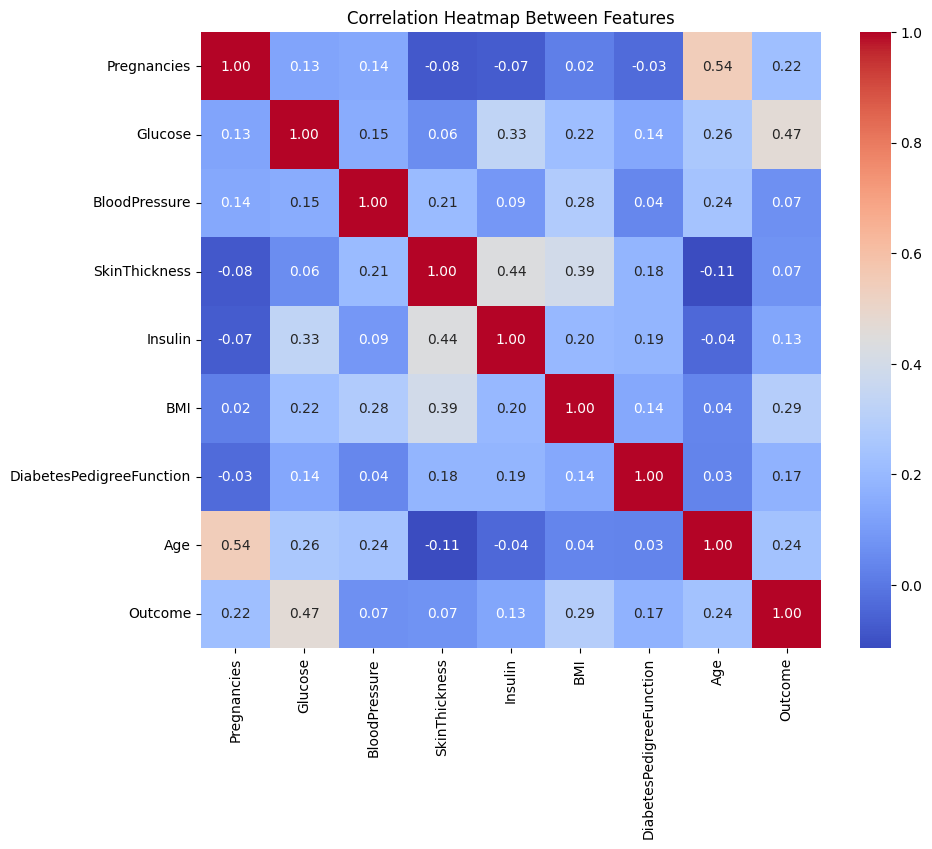

In [9]:
sns.countplot(x='Outcome', data=data, palette='Set2')
plt.title("Distribution of Diabetes Outcome (0=No, 1=Yes)")


data.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap Between Features")




Text(0.5, 1.0, 'Glucose vs BMI colored by Outcome')

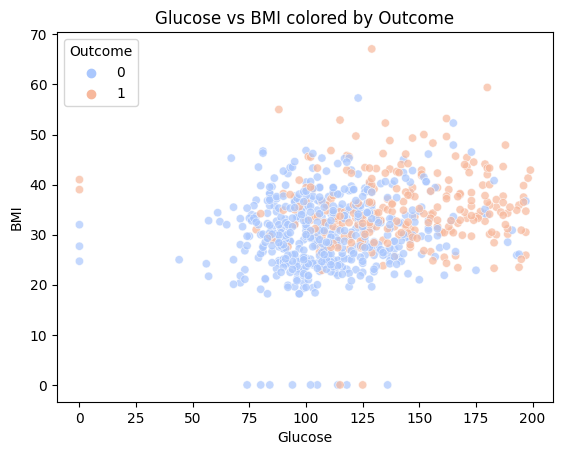

In [10]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data, alpha=0.7, palette='coolwarm')
plt.title("Glucose vs BMI colored by Outcome")



In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)



from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42,test_size=0.2)

In [20]:
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    results.append([name, acc, f1, pre, rec])

    print(f"{name}:")
    print(f"   Accuracy   : {acc:.4f}")
    print(f"   F1-score   : {f1:.4f}")
    print(f"   Precision  : {pre:.4f}")
    print(f"   Recall     : {rec:.4f}")
    print("-" * 40)

Logistic Regression:
   Accuracy   : 0.7532
   F1-score   : 0.6607
   Precision  : 0.6491
   Recall     : 0.6727
----------------------------------------
Random Forest:
   Accuracy   : 0.7338
   F1-score   : 0.6306
   Precision  : 0.6250
   Recall     : 0.6364
----------------------------------------
XGBoost:
   Accuracy   : 0.7078
   F1-score   : 0.6154
   Precision  : 0.5806
   Recall     : 0.6545
----------------------------------------


In [22]:
import joblib


joblib.dump(model, "diabetes_model.joblib")
joblib.dump(scaler, "scaler.joblib")

print(" Model and scaler saved successfully!")


 Model and scaler saved successfully!


In [23]:
obj = {"scaler": scaler, "model": model}
joblib.dump(obj, "scaler_model_bundle.joblib")


['scaler_model_bundle.joblib']